1. fit function to data features (X) and label (y)
2. Start with random weights (W)
3. use WX + b to do feedforward
4. apply activation fxn to get preediction (p)
5. compare y with p 
6. evaluate with  an objective function (MSE)
7. use optimization function (Gradient descent) to reduce the objective funtion
8. update the weights using back propagation
9. repeat from step 3 (epochs)

In [58]:
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# intialize inputs , output , weights , bias
# neural net with 2 layers

In [60]:
# set seed
np.random.seed(42)

In [61]:
X = np.random.normal(size=(5, 2))

y = np.random.normal(size=(5, 1))

In [62]:
# number of input features
n_input = X.shape[1]

# number of hidden layers
n_hidden = 2

# number of output
n_output = 1

In [63]:
# create random weights for layer 1
# inputs to hidden layer
w1 = np.random.normal(size = (n_input ,n_hidden))
# create random weights for layer 2
# hidden layer to output
w2 = np.random.normal(size = (n_hidden ,n_output ))

In [64]:
# create bias terms
b1 = np.random.normal(size = (1,n_hidden))
b2 = np.random.normal(size = (1,n_output))


In [65]:
print('Features Shape:', X.shape)
print('Labels Shape:', y.shape)
print('Weights Shape:', w1.shape)
print('Weights Shape:', w2.shape)
print('Bias Shape:', b1.shape)
print('Bias Shape:', b2.shape)

Features Shape: (5, 2)
Labels Shape: (5, 1)
Weights Shape: (2, 2)
Weights Shape: (2, 1)
Bias Shape: (1, 2)
Bias Shape: (1, 1)


In [66]:
# activation function

def sigmoid(x):
    return 1/(1 + np.exp(-x))


def sigmoid_prime (x):
    return sigmoid(x) * (1-sigmoid(x))


In [67]:
# forward propagation
def forward_propagation(X,w1,w2,b1,b2):
    x1  = np.dot(X,w1) + b1
    l1  = sigmoid(x1)
    x2 = np.dot(l1,w2) + b2
    l2 = sigmoid(x2)
    return x1,l1,x2,l2

In [68]:
def objective_fxn(y , l2):
    return np.mean(np.square(y - l2))


In [69]:
learning_rate = 0.1
epochs = 1000

In [70]:
def back_propagation(l2, y, x2, x1, l1 , w2,X):
    '''calculate error   
    and error term  (delta d) '''
    error = l2 - y
    
    d2 = error*sigmoid_prime(x2)
    
    d_w2 = np.dot(l1.T,d2)
    
    d_b2 = np.sum(d2,axis=0 ,keepdims=True)
    
    d1 = np.dot(d2,w2.T) * sigmoid_prime(x1)
    
    d_w1 = np.dot(X.T,d1)
    
    d_b1 = np.sum(d1,axis=0)
    
    return d_w2,d_b2,d_w1,d_b1

In [71]:
def update_parameters (d_w2,d_b2,d_w1,d_b1,w1,w2,b1,b2 ,learning_rate):
    '''update weights with the error term and learning rate'''
    w1  -= learning_rate * d_w1
    b1  -= learning_rate * d_b1
    w2  -= learning_rate * d_w2
    b2  -= learning_rate * d_b2
    return w1,b1,w2,b2


In [72]:
losses = []
for epoch in range(epochs):
    x1,l1,x2,l2 = forward_propagation(X,w1,w2,b1,b2)
    d_w2,d_b2,d_w1,d_b1 = back_propagation(l2, y, x2, x1, l1 , w2,X)
    w1,b1,w2,b2 = update_parameters (d_w2,d_b2,d_w1,d_b1,w1,w2,b1,b2 ,learning_rate)
    loss = objective_fxn(y,l2)
    losses.append(loss)
    if epoch % 100 == 0:
        print (f"Epoch : {epoch} , Loss : {loss:.4f}")
        

Epoch : 0 , Loss : 1.7498
Epoch : 100 , Loss : 1.4457
Epoch : 200 , Loss : 1.4353
Epoch : 300 , Loss : 1.4319
Epoch : 400 , Loss : 1.4302
Epoch : 500 , Loss : 1.4292
Epoch : 600 , Loss : 1.4285
Epoch : 700 , Loss : 1.4281
Epoch : 800 , Loss : 1.4277
Epoch : 900 , Loss : 1.4274


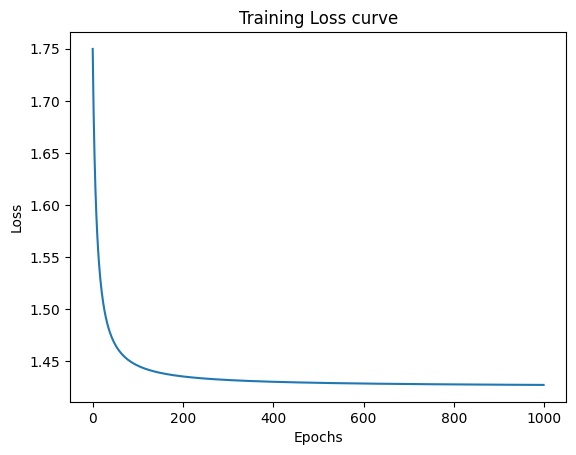

In [73]:
# plot loss curve
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Training Loss curve")
plt.show()
